In [3]:
import matplotlib.pyplot as plt

import numpy as np

from scipy import io

from sklearn.datasets import fetch_openml

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split




In [4]:
#Load data
import pandas as pd

mat_data = io.loadmat('PROACT_data_updated.mat')

data=mat_data['data']

# Print keys to see available variables
print(mat_data.keys())
#print(mat_data.info())
df1 = pd.DataFrame(mat_data['data'])
df2 = pd.DataFrame(mat_data['labels'])
df1.head()
## Print keys to see available variables
#print(data.keys())

target=mat_data['survived']

Dt=mat_data['Dt']

labels = mat_data['labels'] [0]
#print(labels)
#df2


dict_keys(['__header__', '__version__', '__globals__', 'Age', 'Age_at_onset', 'Dt', 'Pat_ID', 'ans', 'censored', 'data', 'labels', 'survived'])


In [8]:
df1

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.0,1.0,48.0,48.934246,0.0,0.0,0.0,0.0,0.0,1.0,...,0.008262,0.079556,0.000011,0.012927,0.011831,0.012840,0.052864,0.001178,0.000007,0.006199
1,0.0,1.0,48.0,48.934246,0.0,0.0,0.0,0.0,0.0,1.0,...,0.007696,0.087512,0.000019,0.012353,0.011415,0.014321,0.021626,0.001178,0.000006,0.003720
2,0.0,1.0,48.0,48.934246,0.0,0.0,0.0,0.0,0.0,1.0,...,0.008262,0.076904,0.000028,0.012927,0.011980,0.012346,0.026432,0.001178,0.000006,0.002480
3,0.0,1.0,48.0,48.934246,0.0,0.0,0.0,0.0,0.0,1.0,...,0.007696,0.084860,0.000012,0.011491,0.011296,0.015309,0.016820,0.001178,0.000006,0.002480
4,0.0,1.0,48.0,48.934246,0.0,0.0,0.0,0.0,0.0,1.0,...,0.008148,0.074252,0.000013,0.011778,0.011207,0.014815,0.016820,0.001178,0.000004,0.004959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16172,1.0,0.0,48.0,48.558903,0.0,0.0,0.0,0.0,0.0,1.0,...,0.008035,0.114121,0.000038,0.012927,0.015161,0.013333,0.057670,0.001688,0.000032,0.006199
16173,1.0,0.0,48.0,48.558903,0.0,0.0,0.0,0.0,0.0,1.0,...,0.007922,0.103447,0.000042,0.013215,0.015161,0.012840,0.016820,0.001577,0.000037,0.003720
16174,1.0,0.0,48.0,48.558903,0.0,0.0,0.0,0.0,0.0,1.0,...,0.008375,0.140393,0.000036,0.012927,0.016052,0.012346,0.016820,0.001777,0.000023,0.006199
16175,1.0,0.0,48.0,48.558903,0.0,0.0,0.0,0.0,0.0,1.0,...,0.007243,0.116584,0.000039,0.011491,0.014863,0.014321,0.028835,0.001555,0.000037,0.008679


In [5]:
Xtrain, Xtest, Ytrain, Ytest =train_test_split(data, target[:,3], test_size=0.3)

RF= RandomForestClassifier(random_state=42, oob_score=True, n_estimators=100)

In [13]:
df2


,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,[Gender0],[Gender1],[Age],[Age_atOnset],[Race1],[Race2],[Race3],[Race4],[Race5],[Race6],...,[Protein],[Phosphorus],[ALTSGPT],[Albumin],[Hematocrit],[Bicarbonate],[AbsoluteEosinophilCount],[Creatinine],[Gammaglutamyltransferase],[AbsoluteBasophilCount]


In [15]:

df_merged = pd.concat([df2,df1], ignore_index=False, sort=False)

df_merged

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,[Gender0],[Gender1],[Age],[Age_atOnset],[Race1],[Race2],[Race3],[Race4],[Race5],[Race6],...,[Protein],[Phosphorus],[ALTSGPT],[Albumin],[Hematocrit],[Bicarbonate],[AbsoluteEosinophilCount],[Creatinine],[Gammaglutamyltransferase],[AbsoluteBasophilCount]
0,0.0,1.0,48.0,48.934246,0.0,0.0,0.0,0.0,0.0,1.0,...,0.008262,0.079556,0.000011,0.012927,0.011831,0.01284,0.052864,0.001178,0.000007,0.006199
1,0.0,1.0,48.0,48.934246,0.0,0.0,0.0,0.0,0.0,1.0,...,0.007696,0.087512,0.000019,0.012353,0.011415,0.014321,0.021626,0.001178,0.000006,0.00372
2,0.0,1.0,48.0,48.934246,0.0,0.0,0.0,0.0,0.0,1.0,...,0.008262,0.076904,0.000028,0.012927,0.01198,0.012346,0.026432,0.001178,0.000006,0.00248
3,0.0,1.0,48.0,48.934246,0.0,0.0,0.0,0.0,0.0,1.0,...,0.007696,0.08486,0.000012,0.011491,0.011296,0.015309,0.01682,0.001178,0.000006,0.00248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16172,1.0,0.0,48.0,48.558903,0.0,0.0,0.0,0.0,0.0,1.0,...,0.008035,0.114121,0.000038,0.012927,0.015161,0.013333,0.05767,0.001688,0.000032,0.006199
16173,1.0,0.0,48.0,48.558903,0.0,0.0,0.0,0.0,0.0,1.0,...,0.007922,0.103447,0.000042,0.013215,0.015161,0.01284,0.01682,0.001577,0.000037,0.00372
16174,1.0,0.0,48.0,48.558903,0.0,0.0,0.0,0.0,0.0,1.0,...,0.008375,0.140393,0.000036,0.012927,0.016052,0.012346,0.01682,0.001777,0.000023,0.006199
16175,1.0,0.0,48.0,48.558903,0.0,0.0,0.0,0.0,0.0,1.0,...,0.007243,0.116584,0.000039,0.011491,0.014863,0.014321,0.028835,0.001555,0.000037,0.008679


In [1]:
#df_new= df_merged.rename(columns=df_merged.iloc[0])

In [39]:
#Filr

RF.fit(Xtrain [Ytrain>-1,:], Ytrain [Ytrain>-1])

Yest =RF.predict(Xtest)

oob_error = 1 - RF.oob_score_

print(oob_error)

print("RF train accuracy: %0.3f" % RF.score (Xtrain, Ytrain))

print("RF test accuracy: %0.3f" % RF.score (Xtest, Ytest))




0.034896401308615044
RF train accuracy: 0.810
RF test accuracy: 0.782


[ 8 15  7  5  6  4  9 14  1  0 11 13 16 17 10 12 21 20 29 19 58 30 27 48
 49 35 32 55 47 31 22 42 51 53  2 52 45 38 50 36 46 57 24 23 41 39 54  3
 37 33 43 28 40 25 26 56 44 34 18]


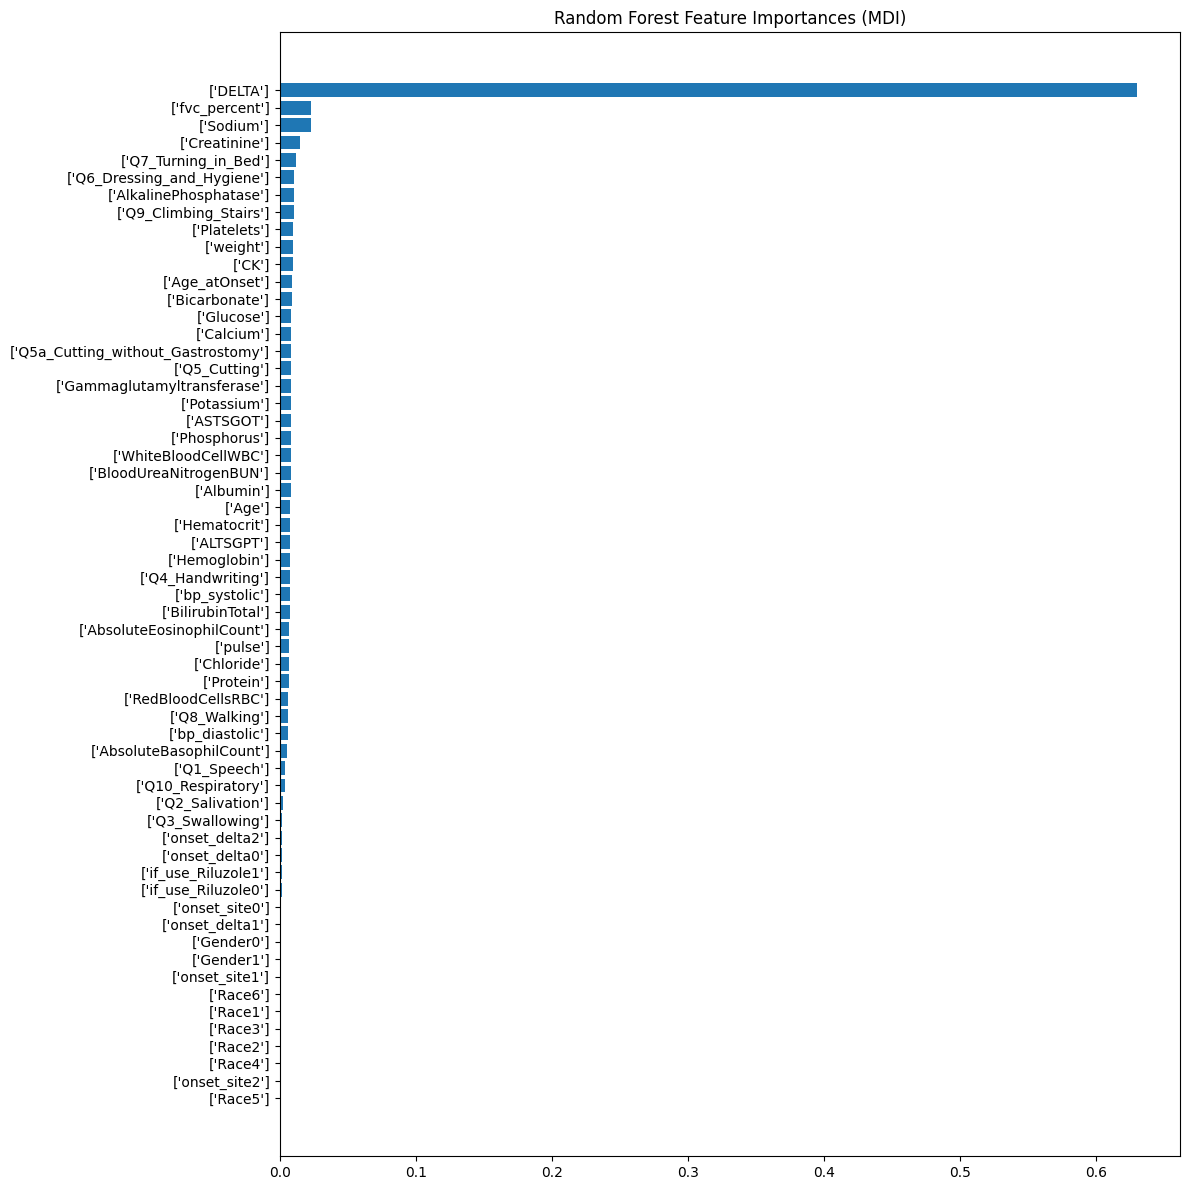

In [40]:
tree_feature_importances = RF.feature_importances_

sorted_idx=tree_feature_importances.argsort()

y_ticks = np.arange(0, 59) 

fig =plt.figure(figsize=(12,12))

ax = fig.subplots()

ax.barh(y_ticks, tree_feature_importances [sorted_idx])

ax.set_yticks(y_ticks)

ax.set_yticklabels (labels [sorted_idx])
print(sorted_idx)
ax.set_title("Random Forest Feature Importances (MDI)")

fig.tight_layout()

plt.show()

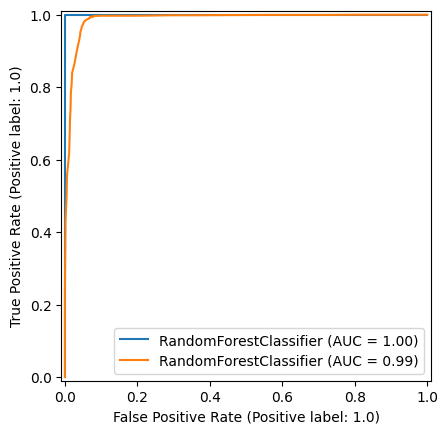

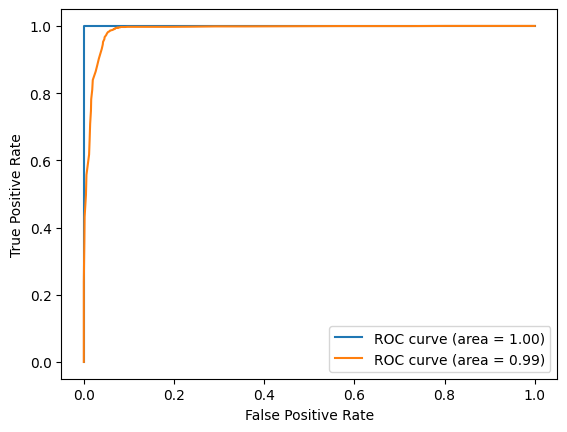

In [31]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots()

# Use PLOT_ROC_CURVE

RocCurveDisplay.from_estimator (RF, Xtrain [Ytrain>-1,:], Ytrain [Ytrain>-1], ax=ax)

RocCurveDisplay.from_estimator (RF, Xtest[Ytest>-1,:], Ytest [Ytest>-1], ax=ax)

plt.show()

# COMPUTE ROC AND PLOT

ptrain=RF.predict_proba (Xtrain [Ytrain>-1,:])

fpr, tpr,_ = metrics.roc_curve (Ytrain [Ytrain>-1], ptrain[:,1])

roc_auc = metrics.auc(fpr, tpr)

fig, ax = plt.subplots()

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ptest = RF.predict_proba(Xtest [Ytest>-1,:])
fpr, tpr, _ = metrics.roc_curve (Ytest[Ytest>-1], ptest[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

D:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Program Files\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


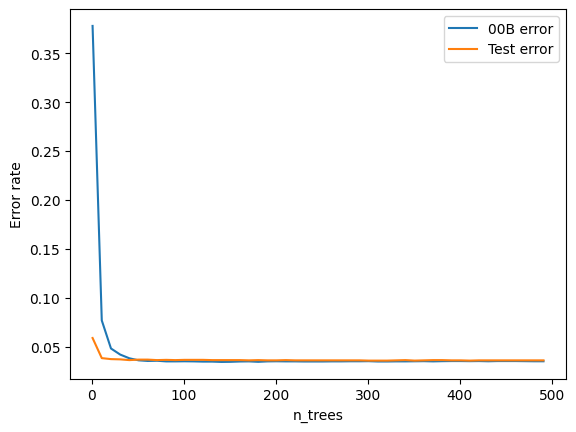

In [46]:
n_trees=np.arange(1,500,10)

error_rate=np.zeros(n_trees.shape)

test_rate=np.zeros(n_trees.shape)

for ind in range(n_trees.shape[0]):
    RF= RandomForestClassifier (random_state=42, oob_score=True, n_estimators=n_trees [ind])
    RF.fit(Xtrain [Ytrain>-1,:], Ytrain [Ytrain>-1])
    Yest=RF.predict(Xtest)
    oob_error = 1 - RF.oob_score_
    test_error=1-sum(Yest[Ytest>-1]==Ytest[Ytest>-1])/sum(Ytest>-1)
    error_rate [ind]=oob_error
    test_rate[ind]=test_error

plt.plot(n_trees, error_rate, label='00B error')
plt.plot(n_trees, test_rate, label='Test error')
plt.xlabel("n_trees")
plt.ylabel("Error rate")
plt.legend(loc="upper right")
plt.show()